In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [3]:
df = pd.read_excel('PI Dashboard 2020.xlsx')
df.head(10)

,WO_SHORT_DESC,ADD_WO_ISSUE,Description,Fail danger
0,FI-A8002 OF FWKO READING ERROR,"FAILURE TO FUNCTION AS INTENDED, FI-A8002 OF F...",FI-A8002 OF FWKO READING ERROR FAILURE TO FUNC...,Y
1,LT-A1500 REDING ERROR,"FAILURE TO FUNCTION AS INTENDED, BEWA CLOSED D...",LT-A1500 REDING ERROR FAILURE TO FUNCTION AS I...,Y
2,RECTIFY TI-7044 SHOW IOP,ABNORMAL INSTRUMENT READING ; TI-7044 SHOW IOP,RECTIFY TI-7044 SHOW IOP ABNORMAL INSTRUMENT R...,Y
3,TIT2943 SHOW IOP NEED VERIFY,FAILURE TO FUNCTION AS INTENDED;TIT2943 SHOW I...,TIT2943 SHOW IOP NEED VERIFY FAILURE TO FUNCTI...,N
4,READING ERROR,"FAILURE TO FUNCTION AS INTENDED,READING ERROR","READING ERROR FAILURE TO FUNCTION AS INTENDED,...",N
5,RECTIFY LT-3032 FAULT SIGNAL,FAILURE TO CONNECT(LT-3032 OF CONDENSATE STABI...,RECTIFY LT-3032 FAULT SIGNAL FAILURE TO CONNEC...,N
6,VERIFY PIT-6261 READ ERROR,ABNORMAL INSTRUMENT READING;PIT-6261 WAS READI...,VERIFY PIT-6261 READ ERROR ABNORMAL INSTRUMENT...,N
7,VERIFY LIT-1304 SHOW IOP,FAILURE TO FUNCTION ON DEMAND; LIT-1304 SHOW I...,VERIFY LIT-1304 SHOW IOP FAILURE TO FUNCTION O...,Y
8,REC.LT-1011 OF V1010 READ ERRO,"ABNORMAL INSTRUMENT READING, NEED TO FLUSHING ...",REC.LT-1011 OF V1010 READ ERRO ABNORMAL INSTRU...,N
9,"FAILURE TO START ON DEMAND, TI","FAILURE TO START ON DEMAND, TIT-2083A FAULT AL...","FAILURE TO START ON DEMAND, TI FAILURE TO STAR...",Y


In [4]:
df.columns

Index(['WO_SHORT_DESC', 'ADD_WO_ISSUE', 'Description', 'Fail danger'], dtype='object')

# Cleaning some non-alphabet character

In [5]:
import re

replace_no_space = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_with_space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
tag_re = re.compile(r'<[^>]+>')

# Create transform function from long sentence to words.
def comment_to_words(comment):
    words = replace_no_space.sub("", comment.lower())
    words = replace_with_space.sub(" ", words)
    return words

def remove_tags(comment):
    return tag_re.sub('', comment)

def remove_newline(comment):
    return re.sub("\n","", comment)

- Most of columns in this dataframe are 'object' data type
- id, year, Day is int (don't use in text modelling)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WO_SHORT_DESC  169 non-null    object
 1   ADD_WO_ISSUE   169 non-null    object
 2   Description    169 non-null    object
 3   Fail danger    169 non-null    object
dtypes: object(4)
memory usage: 5.4+ KB


Data set have some missing value but low amount, can be consider to drop out.

In [7]:
#Check for missing values
print('Before drop out missing value')
print(df.isnull().mean()*100)
print('')

print('After drop out missing value')
df.dropna(how = 'any', inplace = True)
print(df.isnull().mean()*100)

Before drop out missing value
WO_SHORT_DESC    0.0
ADD_WO_ISSUE     0.0
Description      0.0
Fail danger      0.0
dtype: float64

After drop out missing value
WO_SHORT_DESC    0.0
ADD_WO_ISSUE     0.0
Description      0.0
Fail danger      0.0
dtype: float64


Target columns for input is 'Comment'

- From visual check, found many html tags appear in this columns
- Replace these tags with empty space

In [8]:
# Before remove html and newline tags.
df['Description']

0      FI-A8002 OF FWKO READING ERROR FAILURE TO FUNC...
1      LT-A1500 REDING ERROR FAILURE TO FUNCTION AS I...
2      RECTIFY TI-7044 SHOW IOP ABNORMAL INSTRUMENT R...
3      TIT2943 SHOW IOP NEED VERIFY FAILURE TO FUNCTI...
4      READING ERROR FAILURE TO FUNCTION AS INTENDED,...
                             ...                        
164    VERIFY AIR FILTER  PDI-3190 OTHER :VERIFY AIR ...
165    TRANSMITTER ABNORMAL READING ABNORMAL INSTRUME...
166    RECTIFY GAS SCRUBBER V-6310 ABNORMAL INSTRUMEN...
167    REPLACE CONDY METER FQI-2670 FAILURE TO ROTATE...
168    VERIFY FALL-2670 ACTIVATED VERY LOW OUTPUT; VE...
Name: Description, Length: 169, dtype: object

In [9]:
# Remove html and new line tags for all index in 'Comment' columns
for index in df.index:
    df['Description'][index] = remove_tags(df['Description'][index])
    df['Description'][index] = remove_newline(df['Description'][index])

df['Description'] =  [comment_to_words(comment) for comment in df['Description']]

In [10]:
# After remove html tags
df['Description']

0      fi a8002 of fwko reading error failure to func...
1      lt a1500 reding error failure to function as i...
2      rectify ti 7044 show iop abnormal instrument r...
3      tit2943 show iop need verify failure to functi...
4      reading error failure to function as intendedr...
                             ...                        
164    verify air filter  pdi 3190 other verify air f...
165    transmitter abnormal reading abnormal instrume...
166    rectify gas scrubber v 6310 abnormal instrumen...
167    replace condy meter fqi 2670 failure to rotate...
168    verify fall 2670 activated very low output ver...
Name: Description, Length: 169, dtype: object

Let drop unrelated columns to reduce memmory of the notebook. This will make computaional faster.

In [11]:
#columns_to_drop = ['id', 'Work Order #', 'Job Type Description',
#                  'Quarter', 'Day']

#df.drop(columns = columns_to_drop, inplace = True)

# Select only 'CR' in Job Type
CR = Corrective repair as a default for failure record

In [12]:
#df = df[df['Job Type'] == 'CR']

# NLTK Data-preprocessing

In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
# Tokenizer function
tokenizer = RegexpTokenizer(r'\w+')
df['Description'] = df['Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [15]:
df['Description'].head()

0    [fi, a8002, of, fwko, reading, error, failure,...
1    [lt, a1500, reding, error, failure, to, functi...
2    [rectify, ti, 7044, show, iop, abnormal, instr...
3    [tit2943, show, iop, need, verify, failure, to...
4    [reading, error, failure, to, function, as, in...
Name: Description, dtype: object

In [16]:
# Remove stopwords 
stop_words = nltk.corpus.stopwords.words('english')
new_stop_words = ['html', 'let', 'per', 'nbsp', 'please','work','order','follow','repair','need','due']
stop_words.extend(new_stop_words)


def remove_stopwords(comment):
    words = [w for w in comment if w not in stop_words]
    return words

df['Description'] = df['Description'].apply(lambda x: remove_stopwords(x))

In [17]:
df['Description']

0      [fi, a8002, fwko, reading, error, failure, fun...
1      [lt, a1500, reding, error, failure, function, ...
2      [rectify, ti, 7044, show, iop, abnormal, instr...
3      [tit2943, show, iop, verify, failure, function...
4      [reading, error, failure, function, intendedre...
                             ...                        
164    [verify, air, filter, pdi, 3190, verify, air, ...
165    [transmitter, abnormal, reading, abnormal, ins...
166    [rectify, gas, scrubber, v, 6310, abnormal, in...
167    [replace, condy, meter, fqi, 2670, failure, ro...
168    [verify, fall, 2670, activated, low, output, v...
Name: Description, Length: 169, dtype: object

In [18]:
# Lemmatization 

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(comment):
    lem_text = ' '.join([lemmatizer.lemmatize(word) for word in comment])
    return lem_text

df['Description'] = df['Description'].apply(lambda x : word_lemmatizer(x))

In [19]:
df['Description']

0      fi a8002 fwko reading error failure function i...
1      lt a1500 reding error failure function intende...
2      rectify ti 7044 show iop abnormal instrument r...
3      tit2943 show iop verify failure function inten...
4      reading error failure function intendedreading...
                             ...                        
164    verify air filter pdi 3190 verify air filter p...
165    transmitter abnormal reading abnormal instrume...
166    rectify gas scrubber v 6310 abnormal instrumen...
167    replace condy meter fqi 2670 failure rotate re...
168    verify fall 2670 activated low output verify f...
Name: Description, Length: 169, dtype: object

Remove number with empty space to reduce wording.

In [20]:
# Replace numeric with words
def replace_numeric_with_words(x):
    return re.sub(r'\d+', lambda m: "".format(len(m.group())), x)

df['Description'] = df['Description'].apply(replace_numeric_with_words)

In [21]:
# Split sentence to word by whitespace with no condition 
split_word_set = df['Description'].str.lower().str.split()

# Create unique words length from set operation and count the unique words by
df['count_unique_words'] = split_word_set.apply(set).apply(len)

# Create 'count_words' columns to count
df['count_words'] = [len(sentence) for sentence in df['Description']]

In [22]:
# Check distribution of unique words in comment by statistic properties
print(df['count_unique_words'].describe())
print('')
print(df['count_words'].describe())

count    169.000000
mean       7.946746
std        1.865285
min        4.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       13.000000
Name: count_unique_words, dtype: float64

count    169.000000
mean      73.142012
std       14.262962
min       30.000000
25%       64.000000
50%       74.000000
75%       85.000000
max       99.000000
Name: count_words, dtype: float64


Check distribution and correlation of number of words vs. number of unique words

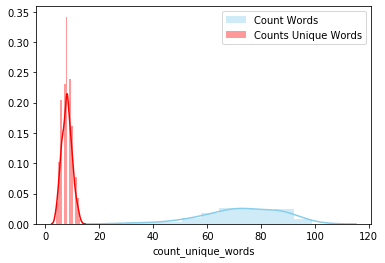

In [23]:
sns.distplot( df["count_words"] , color="skyblue", label="Count Words")
sns.distplot( df["count_unique_words"] , color="red", label="Counts Unique Words")
plt.legend()

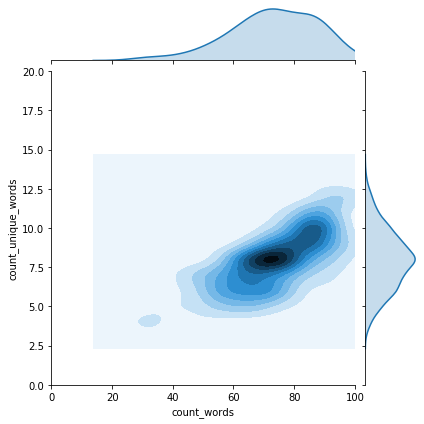

In [24]:
sns.jointplot(x=df["count_words"], 
              y=df["count_unique_words"],
              xlim = {0,100}, ylim = {0,20},
              kind='kde')

# Failure Code Distribution
Highly imbalance from all 'Failure' in dataframe (Max = 977 times, Min = 1 time)
Total 207 'Failure' code in dataframe

In [25]:
'''# Before select frequency of occurence threshold
print(f"Total unique {len(df['Failure'].unique())} of failure code")
print(f"Max frequency is {df['Failure'].value_counts().max()}, on {df['Failure'].value_counts().index[0]}")
print(f"Min frequency is {df['Failure'].value_counts().min()}, on {df['Failure'].value_counts().index[-1]}")
'''

'# Before select frequency of occurence threshold\nprint(f"Total unique {len(df[\'Failure\'].unique())} of failure code")\nprint(f"Max frequency is {df[\'Failure\'].value_counts().max()}, on {df[\'Failure\'].value_counts().index[0]}")\nprint(f"Min frequency is {df[\'Failure\'].value_counts().min()}, on {df[\'Failure\'].value_counts().index[-1]}")\n'

Cut off threshold for failure code at 100 occurence

In [26]:
'''# This value can be subject to change later.
threshold = 100

failure_code_count = df['Failure'].value_counts()
to_remove = failure_code_count[failure_code_count <= threshold].index

df['Failure'].replace(to_remove, np.nan, inplace = True)
df.dropna(how = 'any', inplace = True)
'''

"# This value can be subject to change later.\nthreshold = 100\n\nfailure_code_count = df['Failure'].value_counts()\nto_remove = failure_code_count[failure_code_count <= threshold].index\n\ndf['Failure'].replace(to_remove, np.nan, inplace = True)\ndf.dropna(how = 'any', inplace = True)\n"

In [27]:
'''# After select frequency of occurence threshold
print(f"Total unique {len(df['Failure'].unique())} of failure code")
print(f"Max frequency is {df['Failure'].value_counts().max()}, on {df['Failure'].value_counts().index[0]}")
print(f"Min frequency is {df['Failure'].value_counts().min()}, on {df['Failure'].value_counts().index[-1]}")
'''

'# After select frequency of occurence threshold\nprint(f"Total unique {len(df[\'Failure\'].unique())} of failure code")\nprint(f"Max frequency is {df[\'Failure\'].value_counts().max()}, on {df[\'Failure\'].value_counts().index[0]}")\nprint(f"Min frequency is {df[\'Failure\'].value_counts().min()}, on {df[\'Failure\'].value_counts().index[-1]}")\n'

In [28]:
'''import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
df.groupby('Failure').Comment.count().plot.bar(ylim=0)
plt.show()
'''

"import matplotlib.pyplot as plt\nfig = plt.figure(figsize=(20,6))\ndf.groupby('Failure').Comment.count().plot.bar(ylim=0)\nplt.show()\n"

# Trial on single failure code prediction
Use max frequency of occurence as interesting class ('Seal / Gasket - Gasket, Seals & O-Ring' = 1)
Make other failure class = 0

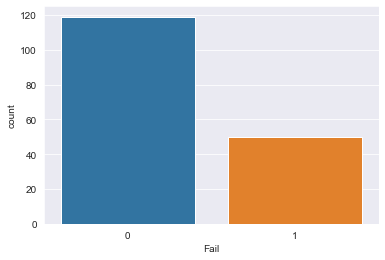

In [29]:
df['Fail']  = df['Fail danger'].apply(lambda val: 1 if val  == 'Y' else 0)
sns.set_style("darkgrid")
sns.countplot(df.Fail)

In [30]:
df['Description']

0      fi a fwko reading error failure function inten...
1      lt a reding error failure function intended be...
2      rectify ti  show iop abnormal instrument readi...
3      tit show iop verify failure function intendedt...
4      reading error failure function intendedreading...
                             ...                        
164    verify air filter pdi  verify air filter pdi  ...
165    transmitter abnormal reading abnormal instrume...
166    rectify gas scrubber v  abnormal instrument re...
167    replace condy meter fqi  failure rotate replac...
168    verify fall  activated low output verify fall ...
Name: Description, Length: 169, dtype: object

# Extract Bag-of-Words features

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Total Dataset
BoW for all failure code.

In [32]:
#Create BoW features from 'Comment'
cv = CountVectorizer(max_features = 150) # Estimate from max number of unique words list
dtm = cv.fit_transform(df['Description'])

words = np.array(cv.get_feature_names())
dtm_df = pd.DataFrame.from_records(dtm.A, columns=words)

# Selected Failure Code on dataset¶
Let investigate only failure code = 'Seal'

In [33]:
#Create BoW features from 'Comment'
cv_seal = CountVectorizer(max_features = 150) # Estimate from max number of unique words list
dtm_seal = cv_seal.fit_transform(df[df['Fail'] == 1 ]['Description'])

words_seal = np.array(cv_seal.get_feature_names())
dtm_df_seal = pd.DataFrame.from_records(dtm_seal.A, columns=words_seal)

# Word Frequency
All failure mode

In [37]:
#Look at top 50 most frequent words
freqs=dtm.sum(axis=0).A.flatten() 
index=np.argsort(freqs)[-50:] 
print(list(zip(words[index], freqs[index]))) 

WordFreq = pd.DataFrame.from_records(list(zip(words[index], freqs[index]))) 
WordFreq.columns = ['Word', 'Freq']

[('booster', 8), ('stuck', 8), ('fi', 8), ('malfunction', 8), ('pressure', 9), ('alarm', 9), ('intended', 9), ('replace', 9), ('skim', 9), ('moisture', 10), ('demand', 10), ('local', 10), ('temp', 11), ('leakage', 11), ('low', 11), ('meter', 11), ('deviation', 12), ('condensate', 12), ('calibrate', 12), ('pi', 12), ('nan', 12), ('rectify', 12), ('fix', 12), ('gas', 13), ('fault', 13), ('lic', 13), ('display', 14), ('transmitter', 14), ('pump', 14), ('condy', 15), ('lt', 17), ('output', 17), ('tit', 17), ('ti', 18), ('sep', 18), ('flow', 19), ('cant', 22), ('parameter', 22), ('lit', 25), ('pit', 29), ('function', 30), ('fit', 31), ('iop', 37), ('failure', 38), ('verify', 40), ('show', 42), ('instrument', 63), ('abnormal', 65), ('error', 95), ('reading', 160)]


Failure mode

In [38]:
#Look at top 50 most frequent words 
freqs=dtm_seal.sum(axis=0).A.flatten() 
index=np.argsort(freqs)[-50:] 
print(list(zip(words[index], freqs[index]))) 

WordFreq = pd.DataFrame.from_records(list(zip(words_seal[index], freqs[index]))) 
WordFreq.columns = ['Word', 'Freq']

[('time', 2), ('valve', 2), ('seal', 2), ('drum', 2), ('output', 2), ('drain', 2), ('leak', 2), ('surge', 2), ('no', 3), ('transmitter', 3), ('cell', 3), ('fail', 3), ('fi', 3), ('flow', 3), ('test', 3), ('lit', 3), ('lpofic', 3), ('maintenance', 3), ('oil', 3), ('perform', 3), ('psig', 3), ('seeping', 4), ('module', 4), ('instrument', 4), ('inlet', 4), ('scrub', 4), ('swing', 4), ('comp', 4), ('rate', 4), ('turbine', 5), ('pit', 5), ('train', 6), ('vent', 6), ('sometime', 6), ('function', 6), ('temp', 8), ('calibrate', 8), ('read', 10), ('hmi', 10), ('deviation', 10), ('new', 12), ('lzit', 14), ('status', 14), ('minor', 16), ('lp', 16), ('abnormal', 17), ('level', 18), ('fqi', 23), ('fit', 37), ('replace', 50)]


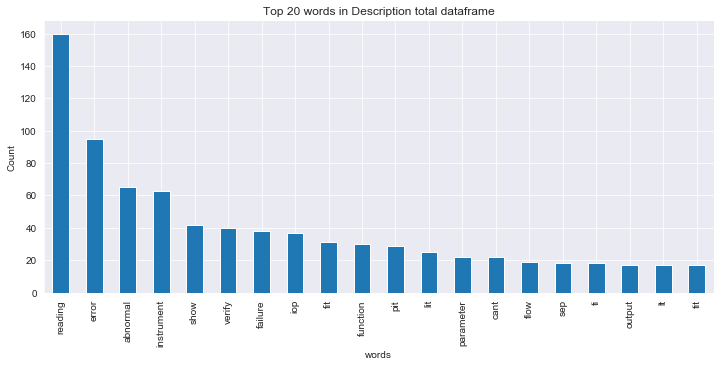

In [39]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top unigrams
uni_words_sw = get_top_n_words(df['Description'], 20)

df1 = pd.DataFrame(uni_words_sw, columns=['words', 'count'])
df1.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
                                                                            title='Top 20 words in Description total dataframe', ax=ax1)
ax1.set(ylabel='Count')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

In [37]:
#fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top unigrams
#uni_words_sw = get_top_n_words(df[df['Fail'] == 1]['Description'], 20)

#df1 = pd.DataFrame(uni_words_sw, columns=['words', 'count'])
#df1.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
#                                                                            title='Top 20 words in Description Seal failure code', ax=ax1)
#ax1.set(ylabel='Count')
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)

In [39]:
'''fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top unigrams
uni_words_sw = get_top_n_words(df['Description'], 20)

df1 = pd.DataFrame(uni_words_sw, columns=['words', 'count'])
df1.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
                                                                            title='Top 20 words in Description total dataframe', ax=ax1)
ax1.set(ylabel='Count')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
'''

"fig, ax1 = plt.subplots(1, 1, figsize=(12,5))\n\n# Top unigrams\nuni_words_sw = get_top_n_words(df['Description'], 20)\n\ndf1 = pd.DataFrame(uni_words_sw, columns=['words', 'count'])\ndf1.groupby('words').sum()['count'].sort_values(ascending=False).plot(kind='bar', \n                                                                            title='Top 20 words in Description total dataframe', ax=ax1)\nax1.set(ylabel='Count')\nax1.spines['right'].set_visible(False)\nax1.spines['top'].set_visible(False)\n"

[Text(0, 0.5, 'Count')]

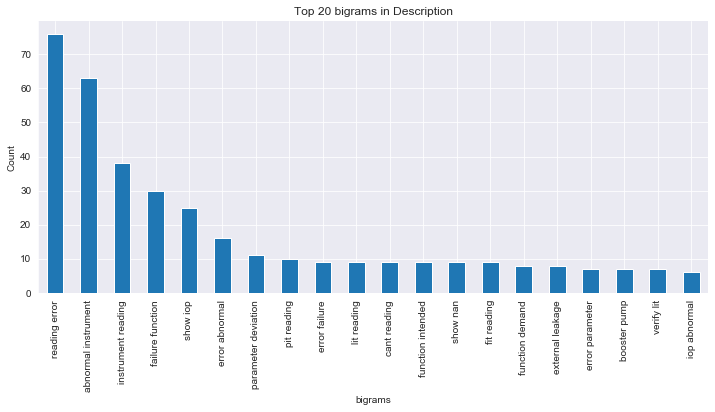

In [41]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top bigrams before removing stop words

bi_words_sw = get_top_n_bigram(df['Description'], 20)

df3 = pd.DataFrame(bi_words_sw, columns=['bigrams', 'count'])
df3.groupby('bigrams').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
                                                                            title='Top 20 bigrams in Description',
                                                                            ax=ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set(ylabel= 'Count')

In [40]:
'''fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top bigrams before removing stop words

bi_words_sw = get_top_n_bigram(df[df['Fail'] == 1]['Description'], 20)

df3 = pd.DataFrame(bi_words_sw, columns=['bigrams', 'count'])
df3.groupby('bigrams').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
                                                                            title='Top 20 bigrams in Description in failure danger',
                                                                            ax=ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set(ylabel= 'Count')
'''

"fig, ax1 = plt.subplots(1, 1, figsize=(12,5))\n\n# Top bigrams before removing stop words\n\nbi_words_sw = get_top_n_bigram(df[df['Fail'] == 1]['Description'], 20)\n\ndf3 = pd.DataFrame(bi_words_sw, columns=['bigrams', 'count'])\ndf3.groupby('bigrams').sum()['count'].sort_values(ascending=False).plot(kind='bar', \n                                                                            title='Top 20 bigrams in Description in failure danger',\n                                                                            ax=ax1)\nax1.spines['right'].set_visible(False)\nax1.spines['top'].set_visible(False)\nax1.set(ylabel= 'Count')\n"

[Text(0, 0.5, 'Count')]

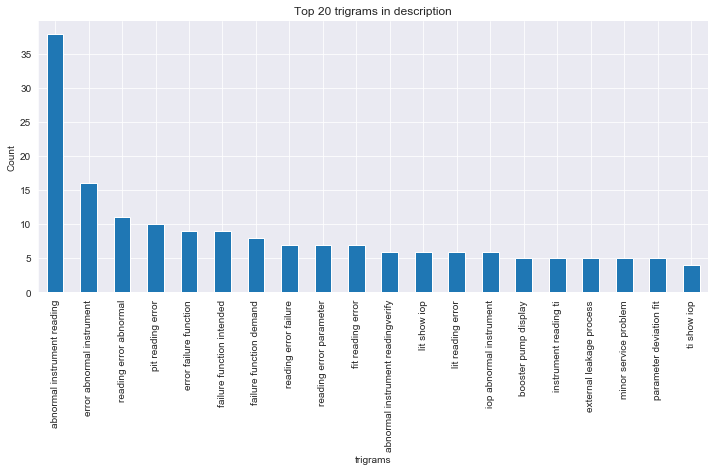

In [42]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top trigrams before removing stop words

fake_tri_words_sw = get_top_n_trigram(df['Description'], 20)

df_fake_5 = pd.DataFrame(fake_tri_words_sw, columns=['trigrams', 'count'])
df_fake_5.groupby('trigrams').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
                                                                            title='Top 20 trigrams in description',
                                                                            ax=ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set(ylabel= 'Count')

In [42]:
'''fig, ax1 = plt.subplots(1, 1, figsize=(12,5))

# Top trigrams before removing stop words

fake_tri_words_sw = get_top_n_trigram(df[df['Fail'] == 1]['Description'], 20)

df_fake_5 = pd.DataFrame(fake_tri_words_sw, columns=['trigrams', 'count'])
df_fake_5.groupby('trigrams').sum()['count'].sort_values(ascending=False).plot(kind='bar', 
                                                                            title='Top 20 trigrams in Description Seal failure mode',
                                                                            ax=ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set(ylabel= 'Count')
'''

"fig, ax1 = plt.subplots(1, 1, figsize=(12,5))\n\n# Top trigrams before removing stop words\n\nfake_tri_words_sw = get_top_n_trigram(df[df['Fail'] == 1]['Description'], 20)\n\ndf_fake_5 = pd.DataFrame(fake_tri_words_sw, columns=['trigrams', 'count'])\ndf_fake_5.groupby('trigrams').sum()['count'].sort_values(ascending=False).plot(kind='bar', \n                                                                            title='Top 20 trigrams in Description Seal failure mode',\n                                                                            ax=ax1)\nax1.spines['right'].set_visible(False)\nax1.spines['top'].set_visible(False)\nax1.set(ylabel= 'Count')\n"

# Prediction Modelling
This problem is binary classification, test with all classifiers on hands.

Logistic Regression will be baseline performance.

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Y = df['Fail']
le = LabelEncoder()
y = le.fit_transform(Y)

X = dtm

In [45]:
# Seperate train-test on data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 , random_state = 123, stratify = y )

In [47]:
lgr = LogisticRegression(random_state = 123)
svc = LinearSVC(random_state = 123)
dtc = DecisionTreeClassifier(random_state = 123)
rfc = RandomForestClassifier(random_state = 123)
abc = AdaBoostClassifier(random_state = 123)
xgbc = XGBClassifier(random_state = 123)
mnb = MultinomialNB()

In [48]:
# Test logistic regression as baseline model with default setting
lgr.fit(X_train, y_train)
print(classification_report(y_test, lgr.predict(X_test)))
print(confusion_matrix(y_test, lgr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.20      0.33         5

    accuracy                           0.76        17
   macro avg       0.88      0.60      0.60        17
weighted avg       0.82      0.76      0.70        17

[[12  0]
 [ 4  1]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
# Define dict of classifier object as a default setting
classifier_dict = {'LogisticRegression' : lgr,
                   'DecisionTree' : dtc,
                   'RandomForest' : rfc,
                   'AdaBoost' : abc,
                   'XGBoost' : xgbc,
                   'LinearSVC' : svc,
                   'MultinomailNB' : mnb
                  }

In [53]:
def train_classifier(model, feature_train, labels_train):
    model.fit(feature_train, labels_train)

def predict_classifier(model, feature_train_test):
    return model.predict(feature_train_test)

def get_accuracy_f1_score(predicted_test, predicted_train, labels_test, labels_train):
    acc_test = accuracy_score(labels_test, predicted_test)
    acc_train = accuracy_score(labels_train, predicted_train)
    
    f1_test = f1_score(labels_test, predicted_test)
    f1_train = f1_score(labels_train, predicted_train)
    
    recall_test = recall_score(labels_test, predicted_test)
    recall_train = recall_score(labels_train, predicted_train)
    
    precision_test = precision_score(labels_test, predicted_test)
    precision_train = precision_score(labels_train, predicted_train)
    
    return acc_test, acc_train, f1_test, f1_train, recall_test, recall_train, precision_test, precision_train

In [54]:
pred_scores = []
for model_name, classifier_model in classifier_dict.items():
    train_classifier(classifier_model, X_train, y_train)
    pred_train = predict_classifier(classifier_model, X_train)
    pred_test = predict_classifier(classifier_model, X_test)
    pred_scores.append((model_name, get_accuracy_f1_score(pred_test, pred_train, y_test, y_train)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
# Change tuple list into dataframe
predict_score_with_model_name = pd.DataFrame(pred_scores, columns = ['model_name', 'score'])
score = pd.DataFrame.from_records(predict_score_with_model_name.pop('score'))
predict_score_with_model_name = predict_score_with_model_name.join(score)
predict_score_with_model_name.columns = ['model_name', 'acc_test', 'acc_train', 'f1_test', 'f1_train','recall_test','recall_train','precision_test','precision_train']

In [56]:
predict_score_with_model_name

,model_name,acc_test,acc_train,f1_test,f1_train,recall_test,recall_train,precision_test,precision_train
0,LogisticRegression,0.823529,0.967105,0.571429,0.943820,0.4,0.933333,1.00,0.954545
1,DecisionTree,0.588235,1.000000,0.222222,1.000000,0.2,1.000000,0.25,1.000000
2,RandomForest,0.705882,0.953947,0.000000,0.915663,0.0,0.844444,0.00,1.000000
3,AdaBoost,0.705882,0.986842,0.285714,0.977273,0.2,0.955556,0.50,1.000000
4,XGBoost,0.823529,0.947368,0.666667,0.904762,0.6,0.844444,0.75,0.974359
5,LinearSVC,0.823529,1.000000,0.666667,1.000000,0.6,1.000000,0.75,1.000000
6,MultinomailNB,0.823529,0.868421,0.666667,0.777778,0.6,0.777778,0.75,0.777778


In [57]:
# Try cross validation score on all model with cv = 20

classifier_dict_tunned = {'DecisionTree' : dtc,
                   'RandomForest' : rfc,
                   'AdaBoost' : abc,
                   'XGBoost' : xgbc
                  }
for model_name, classifier_model in classifier_dict_tunned.items():
    scores = cross_val_score(estimator = classifier_model, X = X_train, y = y_train, cv = 20)
    mean_scores = scores.mean()
    print("Model = " + str(model_name) + " Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Model = DecisionTree Accuracy: 0.7063 (+/- 0.2704)
Model = RandomForest Accuracy: 0.7552 (+/- 0.2294)
Model = AdaBoost Accuracy: 0.7521 (+/- 0.2645)
Model = XGBoost Accuracy: 0.6356 (+/- 0.2774)


In [58]:
# Test validation curve with XGBoost
from sklearn.model_selection import validation_curve

param_range = [0.01, 0.05, 0.1, 0.5, 0.75 , 1]
train_scores, test_scores = validation_curve(
    xgbc, X, y, param_name="learning_rate", param_range=param_range,
    scoring="f1")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [59]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

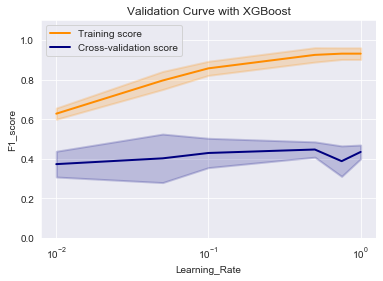

In [60]:
plt.title("Validation Curve with XGBoost")
plt.xlabel("Learning_Rate")
plt.ylabel("F1_score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [61]:
print(classification_report(y_test, xgbc.predict(X_test)))
print(confusion_matrix(y_test, xgbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.75      0.60      0.67         5

    accuracy                           0.82        17
   macro avg       0.80      0.76      0.77        17
weighted avg       0.82      0.82      0.82        17

[[11  1]
 [ 2  3]]


# Multiclass text classification 


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#Creating the features (tf-idf weights) for the processed text
texts = df['Description'].astype('str')
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
                                   min_df = 2, 
                                   max_df = .95)

X = tfidf_vectorizer.fit_transform(texts) #features
y = df['Failure'].values #target
print (X.shape)
print(y.shape)

(6188, 6246)
(6188,)


In [55]:
n = df.Failure.nunique() 
print("No.of.unique values in Failure column :", 
      n)

No.of.unique values in Failure column : 25


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = MultinomialNB().fit(X_train, y_train)


In [57]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, classification_report

grid_predictions = clf.predict(X_train)
#print(confusion_matrix(y_train,grid_predictions))
print(classification_report(y_train,grid_predictions))

grid_predictions = clf.predict(X_test)
#print(confusion_matrix(y_train,grid_predictions))
print(classification_report(y_test,grid_predictions))

                                        precision    recall  f1-score   support

             Assembly - Control System       0.96      0.52      0.68       230
                     Assembly - Cooler       0.00      0.00      0.00        86
              Assembly - Lube Assembly       1.00      0.18      0.31       109
                Assembly - Lubrication       0.65      0.64      0.65       210
                      Assembly - Motor       0.75      0.79      0.77       318
                      Assembly - Panel       1.00      0.12      0.22        83
             Assembly - Pump, Lube Oil       1.00      0.04      0.08        96
                    Assembly - Starter       0.98      0.37      0.54       127
        Assembly - Switch (Electrical)       1.00      0.24      0.38        80
                   Component - Bearing       1.00      0.17      0.29        77
                      Component - Belt       0.97      0.86      0.91       174
                    Component - Filter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
# Define dict of classifier object as a default setting
classifier_dict = {'LogisticRegression' : lgr,
                   'DecisionTree' : dtc,
                   'RandomForest' : rfc,
                   'AdaBoost' : abc,
                   'XGBoost' : xgbc,
                   'LinearSVC' : svc,
                   'MultinomailNB' : mnb
                  }

In [59]:
for model_name, classifier_model in classifier_dict.items():
    clf = classifier_model.fit(X_train, y_train)
    grid_predictions = clf.predict(X_test)
    print(classifier_model)
    print(classification_report(y_test,grid_predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
                                        precision    recall  f1-score   support

             Assembly - Control System       0.74      0.49      0.59        87
                     Assembly - Cooler       0.67      0.25      0.36        16
              Assembly - Lube Assembly       0.71      0.32      0.44        31
                Assembly - Lubrication       0.61      0.58      0.59        66
                      Assembly - Motor       0.56      0.61      0.58       105
                      Assembly - Panel       1.00      0.19      0.32        26
             Assembly - Pump, Lube Oil       0.50      0.05      0.10        19
                    Assembly - Star

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
                                        precision    recall  f1-score   support

             Assembly - Control System       0.73      0.68      0.70        87
                     Assembly - Cooler       0.58      0.88      0.70        16
              Assembly - Lube Assembly       0.95      0.65      0.77        31
                Assembly - Lubrication       0.80 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
#Hyperparameter tuning
#Gridsearch with 5-fold cross validation
#Warning this can take a long time!!!

#RF
bootstrap = [True, False]
max_depth = [10, 50, 100, None]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [800, 1400, 2000]
random_state = [3]

clf = RandomForestClassifier()

params = dict(bootstrap = bootstrap,
              max_depth = max_depth,
              max_features = max_features,
              min_samples_leaf = min_samples_leaf,
              n_estimators = n_estimators,
              random_state=random_state)

gridsearch = GridSearchCV(clf,
                          params, 
                          cv=5,
                          verbose=1, 
                          n_jobs=-1)

rf_best_model = gridsearch.fit(X, y)




"#Hyperparameter tuning\n#Gridsearch with 5-fold cross validation\n#Warning this can take a long time!!!\n\n#RF\nbootstrap = [True, False]\nmax_depth = [10, 50, 100, None]\nmax_features = ['auto', 'sqrt']\nmin_samples_leaf = [1, 2, 4]\nmin_samples_split = [2, 5, 10]\nn_estimators = [800, 1400, 2000]\nrandom_state = [3]\n\nclf = RandomForestClassifier()\n\nparams = dict(bootstrap = bootstrap,\n              max_depth = max_depth,\n              max_features = max_features,\n              min_samples_leaf = min_samples_leaf,\n              n_estimators = n_estimators,\n              random_state=random_state)\n\ngridsearch = GridSearchCV(clf,\n                          params, \n                          cv=5,\n                          verbose=1, \n                          n_jobs=-1)\n\nrf_best_model = gridsearch.fit(X, y)\n\n\n"

In [61]:
print(rf_best_model)

In [62]:
rf_best_model = GridSearchCV(cv=5, error_score='raise-deprecating', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False), iid='warn', n_jobs=-1, param_grid={'bootstrap': [True, False], 'max_depth': [10, 50, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [800, 1400, 2000], 'random_state': [3]}, pre_dispatch='2*n_jobs', refit=True, return_train_score=False, scoring=None, verbose=1)

# print(rf_best_model)
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [800, 1400, 2000],
                         'random_state': [3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6 is pre

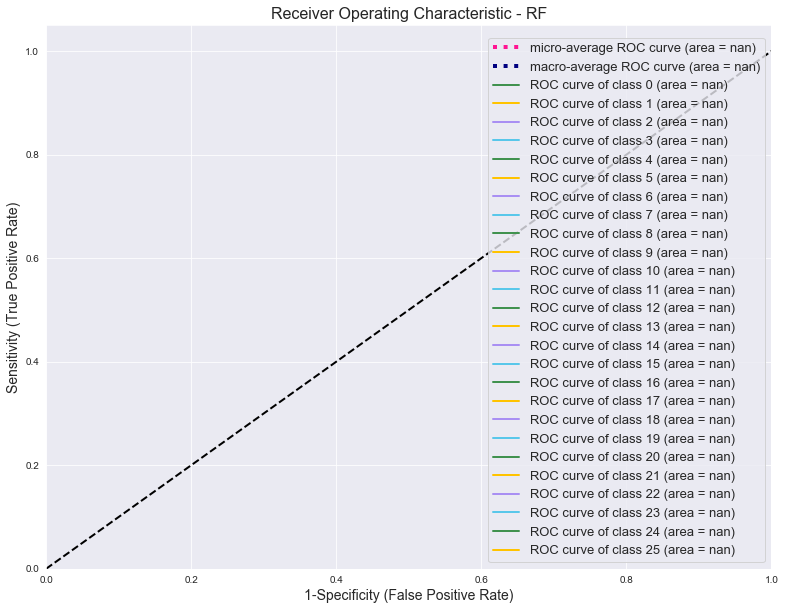

In [63]:
#Plot AUC - RF
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

#Binarize the labels
y_b = label_binarize(y, classes = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
n_classes = y_b.shape[1]

#Shuffle and split training and test sets with stratified sampling and binarized labels
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,
                                                            y_b,
                                                            test_size = .3,
                                                            shuffle = True,
                                                            stratify = y,
                                                            random_state = 3)


#Learn to predict each class against the other
rf_classifier = OneVsRestClassifier(rf_best_model)

y_score = rf_classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Finally average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#Plot all ROC curves
plt.figure(figsize=(13,10)) 
sns.set_style('darkgrid')
lw=2


plt.plot(fpr['micro'], 
         tpr['micro'], 
         label='micro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['micro']),
         color='deeppink',
         linestyle=':', 
         linewidth=4)

plt.plot(fpr['macro'], 
         tpr['macro'], 
         label='macro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['macro']),
         color='navy', 
         linestyle=':', 
         linewidth=4)

colors = cycle(['#41924F', '#FFC300', '#a98ff3', '#59C7EA'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], 
             color=color, 
             lw=lw, 
             label='ROC curve of class {0} (area = {1:0.3f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontsize = 14)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize = 14)
plt.title('Receiver Operating Characteristic - RF', fontsize = 16)
plt.legend(loc="lower right", fontsize = 13)
plt.show()

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 314.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 407.2min finished


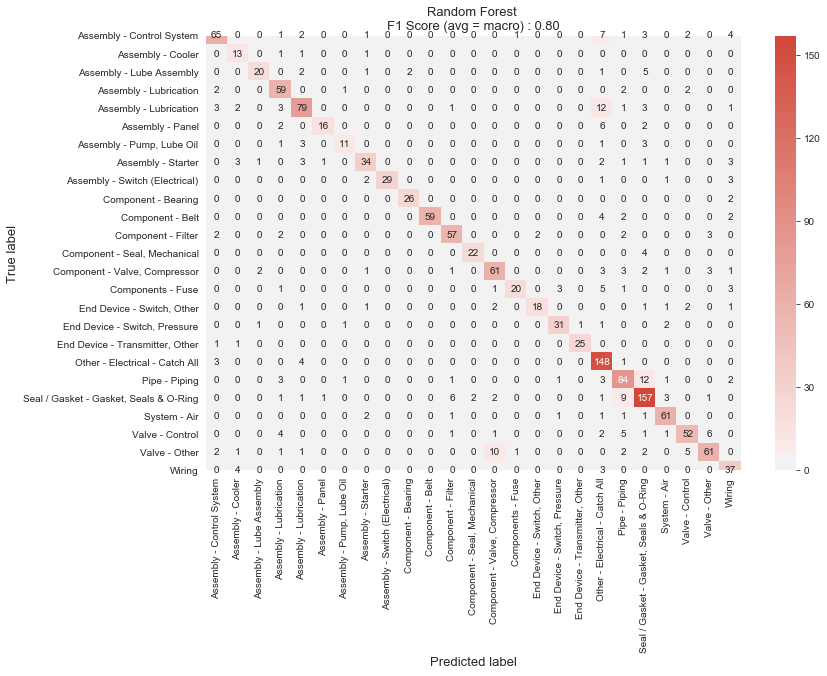

In [64]:

#Confusion Matrix - RF

#Fit the training data
rf_best_model.fit(X_train, y_train)

#Predict the testing data
y_pred = rf_best_model.predict(X_test)

#Get the confusion matrix and put it into a df
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Assembly - Control System','Assembly - Cooler','Assembly - Lube Assembly', 'Assembly - Lubrication','Assembly - Lubrication','Assembly - Panel','Assembly - Pump, Lube Oil','Assembly - Starter','Assembly - Switch (Electrical)','Component - Bearing','Component - Belt','Component - Filter','Component - Seal, Mechanical','Component - Valve, Compressor','Components - Fuse','End Device - Switch, Other','End Device - Switch, Pressure','End Device - Transmitter, Other','Other - Electrical - Catch All','Pipe - Piping','Seal / Gasket - Gasket, Seals & O-Ring','System - Air','Valve - Control','Valve - Other','Wiring'], 
                     columns = ['Assembly - Control System','Assembly - Cooler','Assembly - Lube Assembly', 'Assembly - Lubrication','Assembly - Lubrication','Assembly - Panel','Assembly - Pump, Lube Oil','Assembly - Starter','Assembly - Switch (Electrical)','Component - Bearing','Component - Belt','Component - Filter','Component - Seal, Mechanical','Component - Valve, Compressor','Components - Fuse','End Device - Switch, Other','End Device - Switch, Pressure','End Device - Transmitter, Other','Other - Electrical - Catch All','Pipe - Piping','Seal / Gasket - Gasket, Seals & O-Ring','System - Air','Valve - Control','Valve - Other','Wiring'])

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('Random Forest \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_pred, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

In [67]:
#    clf_rf = rf_best_model.fit(X_train, y_train)
#    grid_predictions_rf = clf_rf.predict(X_test)
#    print(rf_best_model)
#    print(classification_report(y_test,grid_predictions_rf))

In [66]:
    print(rf_best_model)
    print(classification_report(y_test,y_pred))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid